In [1]:
# Reason why we have the getOrCreate code
# http://stackoverflow.com/questions/28999332/how-to-access-sparkcontext-in-pyspark-script
sc = SparkContext.getOrCreate()

In [2]:
# reduce generates a single item on the master node
rdd = sc.parallelize([0,1,2])
rdd.map(lambda x: x*x)\
    .reduce(lambda x, y: x+y)

5

In [3]:
# collect() collects all of the items in the RDD into a list in the master
rdd = sc.parallelize([0,1,2])
A = rdd.map(lambda x: x*x)
A.collect()

[0, 1, 4]

In [4]:
n = 10000
B = sc.parallelize(range(n))
print 'first element =', B.first()
print 'first 5 elements =', B.take(5)

first element = 0
first 5 elements = [0, 1, 2, 3, 4]


In [5]:
n = 10000
B = sc.parallelize(range(n))
m = 5.
C = B.sample(False, m/n) #sampling w/, w/o replacement for F/T; m/n is the reation is things you want to get with number of things there are
C.collect()

[670, 1942, 3788, 5675, 8634, 8756, 9487, 9668]

In [8]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

('Number of random points:', 1000000)
('Mean:', array([-0.00030266,  0.00014505]))
('stdev:', array([ 0.57770863,  0.57740269]))


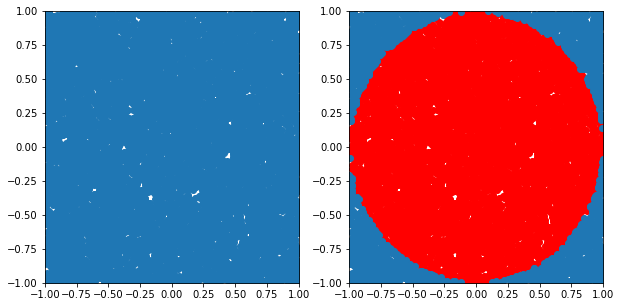

In [9]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)